# Helper functions

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
data = pd.read_csv('/CNNS/train.csv')

In [4]:
data = np.array(data)
m, n = data.shape
neurons = 10

#_, m_train = X_train.shape

def init_data(data, samples = 41000):
    m, n = data.shape # m = samples total, n = input neurons + 1
    np.random.shuffle(data)

    data_dev = data[:1000].T
    Y_dev = data_dev[0]
    X_dev = data_dev[1:n]
    X_dev = X_dev / 255. # squish to [0;1]

    data_train = data[1000:max(m, samples + 1000)].T
    Y_train = data_train[0]
    X_train = data_train[1:n]
    X_train = X_train / 255.

    return X_train, Y_train, X_dev, Y_dev

In [5]:
def init_params_uni(neurons):
    W1 = np.random.rand(neurons, 784) - 0.5
    b1 = np.random.rand(neurons, 1) - 0.5
    W2 = np.random.rand(10, neurons) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def init_params_normal(neurons):
    W1 = np.random.normal(size=(neurons, 784))
    b1 = np.random.normal(size=(neurons, 1))
    W2 = np.random.normal(size=(10, neurons))
    b2 = np.random.normal(size=(10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def dReLU(Z):
    return Z > 0

def Sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def dSigmoid(Z):
    s = Sigmoid(Z)
    return s * (1 - s)

def Heaviside(x):
  return np.where(x >= 0, 1, 0)

def dHeaviside(x):
  return np.where(x == 0, 0, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X, activation = ReLU):
    Z1 = W1.dot(X) + b1
    A1 = activation(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def back_prop(Z1, A1, Z2, A2, W2, X, Y, deactivation = dReLU):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deactivation(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
#    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, neurons, iterations, alpha, activation, deactivation):
    W1, b1, W2, b2 = init_params_normal(neurons)
    W1_, b1_, W2_, b2_ = W1, b1, W2, b2
    for i in range(1, iterations+1):
        Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X, activation)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, deactivation)
        W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i%50 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2, W1_, b1_, W2_, b2_

def gradient_descent_pickup(X, Y, neurons, iterations, alpha, activation, deactivation, path="/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/0"):
    W1 = np.load(os.path.join(path, "W1_.npy"))
    b1 = np.load(os.path.join(path, "b1_.npy"))
    W2 = np.load(os.path.join(path, "W2_.npy"))
    b2 = np.load(os.path.join(path, "b2_.npy"))
    W1_, b1_, W2_, b2_ = W1, b1, W2, b2
    for i in range(1, iterations+1):
        Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X, activation)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, deactivation)
        W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i%50 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2, W1_, b1_, W2_, b2_

# Basic training


In [ ]:
DW1, Db1, DW2, Db2 = [], [], [], []

neurons = 20
iterations = 200
alpha = 2
activation = Sigmoid
deactivation = dSigmoid
samples = 40000

folder = "/CNNS/" + '_'.join(["1.21", "CNN_normal", "Sigmoid", str(neurons), str(iterations), str(alpha), "samples=", str(samples)])
if not os.path.exists(folder):
    os.makedirs(folder)

for i in range(10):
    print("Training model ", i + 1)
    X_train, Y_train, X_dev, Y_dev = init_data(data)
    W1, b1, W2, b2, W1_, b1_, W2_, b2_ = gradient_descent(X_train, Y_train, neurons, iterations, alpha, activation, deactivation)

    path = os.path.join(folder, str(i))
    if not os.path.exists(path):
        os.makedirs(path)
    with open(os.path.join(path, "W1.txt"), 'w') as f:
        f.write(str(W1))
    with open(os.path.join(path, "b1.txt"), 'w') as f:
        f.write(str(b1))
    with open(os.path.join(path, "W2.txt"), 'w') as f:
        f.write(str(W2))
    with open(os.path.join(path, "b2.txt"), 'w') as f:
        f.write(str(b2))
    with open(os.path.join(path, "W1_.txt"), 'w') as f:
        f.write(str(W1_))
    with open(os.path.join(path, "b1_.txt"), 'w') as f:
        f.write(str(b1_))
    with open(os.path.join(path, "W2_.txt"), 'w') as f:
        f.write(str(W2_))
    with open(os.path.join(path, "b2_.txt"), 'w') as f:
        f.write(str(b2_))
    np.save(os.path.join(path, "W1"), W1)
    np.save(os.path.join(path, "b1"), b1)
    np.save(os.path.join(path, "W2"), W2)
    np.save(os.path.join(path, "b2"), b2)
    np.save(os.path.join(path, "W1_"), W1_)
    np.save(os.path.join(path, "b1_"), b1_)
    np.save(os.path.join(path, "W2_"), W2_)
    np.save(os.path.join(path, "b2_"), b2_)

    DW1.append(np.sqrt(np.sum((W1 - W1_) ** 2)))
    Db1.append(np.sqrt(np.sum((b1 - b1_) ** 2)))
    DW2.append(np.sqrt(np.sum((W2 - W2_) ** 2)))
    Db2.append(np.sqrt(np.sum((b2 - b2_) ** 2)))

    print("Distance moved W1: ", np.sqrt(np.sum((W1 - W1_) ** 2)))
    print("Distance moved b1: ", np.sqrt(np.sum((b1 - b1_) ** 2)))
    print("Distance moved W2: ", np.sqrt(np.sum((W2 - W2_) ** 2)))
    print("Distance moved b2: ", np.sqrt(np.sum((b2 - b2_) ** 2)))
    print("\n")
#print(DW1)
#print(Db1)
#print(DW2)
#print(Db2)

Training model  1
Iteration:  50
Accuracy:  0.6857560975609757
Iteration:  100
Accuracy:  0.7761219512195122
Iteration:  150
Accuracy:  0.8142195121951219
Iteration:  200
Accuracy:  0.8385121951219512
Distance moved W1:  16.41772847459775
Distance moved b1:  6.532922710184315
Distance moved W2:  14.112608082186767
Distance moved b2:  4.825525539654403e-16


Training model  2
Iteration:  50
Accuracy:  0.6881951219512195
Iteration:  100
Accuracy:  0.775
Iteration:  150
Accuracy:  0.8112926829268293
Iteration:  200
Accuracy:  0.8337317073170731
Distance moved W1:  16.240533142325543
Distance moved b1:  0.0579262414182371
Distance moved W2:  12.777478637710313
Distance moved b2:  7.361770754041233e-16


Training model  3
Iteration:  50
Accuracy:  0.655219512195122
Iteration:  100
Accuracy:  0.7458536585365854
Iteration:  150
Accuracy:  0.7865121951219513
Iteration:  200
Accuracy:  0.8123414634146342
Distance moved W1:  16.620305209405775
Distance moved b1:  2.439062081929903
Distance moved

In [ ]:
folder = "/CNNS/" + '_'.join(["1.21", "CNN_uni", "Sigmoid", str(neurons), str(iterations), str(alpha), "samples=", str(samples)])
if not os.path.exists(folder):
    os.makedirs(folder)

old = "/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/0"

path = os.path.join(folder, "overtrain1")
if not os.path.exists(path):
    os.makedirs(path)
X_train, Y_train, X_dev, Y_dev = init_data(data)
W1, b1, W2, b2, W1_, b1_, W2_, b2_ = gradient_descent_pickup(X_train, Y_train, neurons, iterations, alpha, activation, deactivation, old)
np.save(os.path.join(path, "W1"), W1)
np.save(os.path.join(path, "b1"), b1)
np.save(os.path.join(path, "W2"), W2)
np.save(os.path.join(path, "b2"), b2)
np.save(os.path.join(path, "W1_"), W1_)
np.save(os.path.join(path, "b1_"), b1_)
np.save(os.path.join(path, "W2_"), W2_)
np.save(os.path.join(path, "b2_"), b2_)

Iteration:  50
Accuracy:  0.8193658536585365
Iteration:  100
Accuracy:  0.8629024390243902
Iteration:  150
Accuracy:  0.8800243902439024
Iteration:  200
Accuracy:  0.8908536585365854
Iteration:  250
Accuracy:  0.8984634146341464
Iteration:  300
Accuracy:  0.9036585365853659
Iteration:  350
Accuracy:  0.908390243902439
Iteration:  400
Accuracy:  0.9117804878048781
Iteration:  450
Accuracy:  0.9149756097560976
Iteration:  500
Accuracy:  0.9178048780487805
Iteration:  550
Accuracy:  0.9209024390243903
Iteration:  600
Accuracy:  0.9234146341463415
Iteration:  650
Accuracy:  0.9255609756097561
Iteration:  700
Accuracy:  0.9279512195121952
Iteration:  750
Accuracy:  0.929439024390244
Iteration:  800
Accuracy:  0.9308780487804879
Iteration:  850
Accuracy:  0.9324634146341464
Iteration:  900
Accuracy:  0.9341707317073171
Iteration:  950
Accuracy:  0.9355121951219513
Iteration:  1000
Accuracy:  0.9370243902439025


In [ ]:
def get_distance(path):
  W1 = np.load(os.path.join(path, "W1.npy"))
  W1_ = np.load(os.path.join(path, "W1_.npy"))
  d = np.sqrt(np.sum((W1 - W1_) ** 2))
  wd = d / W1.size
  return d, wd

path = "/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/0"
print(path)
print(get_distance(path))
path = "/CNNS/1.21_CNN_uni_Sigmoid_100_1000_2_samples=_40000/0"
print(path)
print(get_distance(path))
path = "/CNNS/1.21_CNN_normal_Sigmoid_100_1000_0.5_samples=_40000/0"
print(path)
print(get_distance(path))
path = "/CNNS/1.21_CNN_normal_Sigmoid_100_1000_2_samples=_40000/0"
print(path)
print(get_distance(path))

/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/0
(11.39836040114353, 0.00014538725001458583)
/CNNS/1.21_CNN_uni_Sigmoid_100_1000_2_samples=_40000/0
(19.430574013635265, 0.00024783895425555186)
/CNNS/1.21_CNN_normal_Sigmoid_100_1000_0.5_samples=_40000/0
(19.270005172039788, 0.0002457908822964259)
/CNNS/1.21_CNN_normal_Sigmoid_100_1000_2_samples=_40000/0
(19.67406509123104, 0.0002509447077963143)


# Vizualisations

## Weight distributions



Displays the histograms of $W_1$ before and after training.

Relevant entries:


### 100 neurons, 2000 epoches, uniform distribution, $\eta=0.5$
- "/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/overtrain1

### 100 neurons, 1000 epoches, normal distribution, $\eta=0.5$
- "/CNNS/1.21_CNN_normal_Sigmoid_100_1000_0.5_samples=_40000/0"

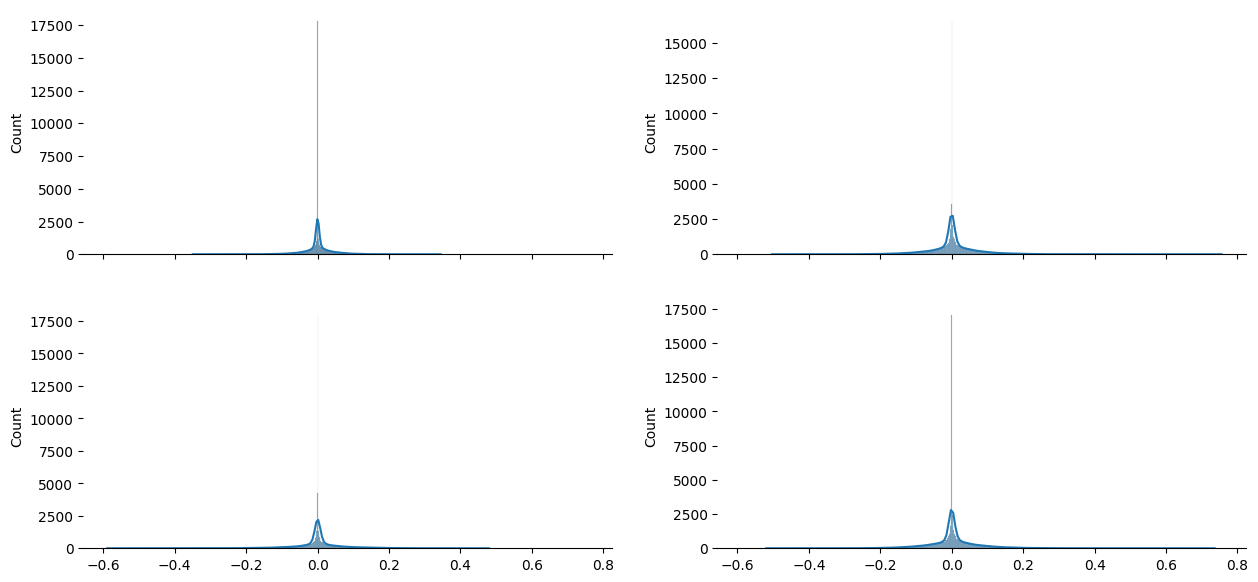

In [34]:
import seaborn as sns

def get_data(path):
  W1 = np.load(os.path.join(path, "W1.npy"))
  W1_ = np.load(os.path.join(path, "W1_.npy"))
  return W1, W1_

def draw_diff(path, x, y):

  W1 = np.load(os.path.join(path, "W1.npy"))
  W1_ = np.load(os.path.join(path, "W1_.npy"))
  W1Flat = (W1_ - W1).flatten()
  sns.histplot(W1Flat, kde=True, ax=axes[x, y])

def draw_hist(path):
  f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=True)
  sns.despine(left=True)
  W1, W1_ = get_data(path)
  W1Flat = W1.flatten()
  W1_Flat = W1_.flatten()
  W2Flat = W2.flatten()
  W2_Flat = W2_.flatten()
  sns.histplot(W1_Flat, kde=True, ax=axes[0])
  sns.histplot(W1Flat, kde=True, ax=axes[1])
  plt.show()

draw_hist("/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/overtrain1")
draw_hist("/CNNS/1.21_CNN_normal_Sigmoid_100_1000_0.5_samples=_40000/0")

## Weight change histograms  

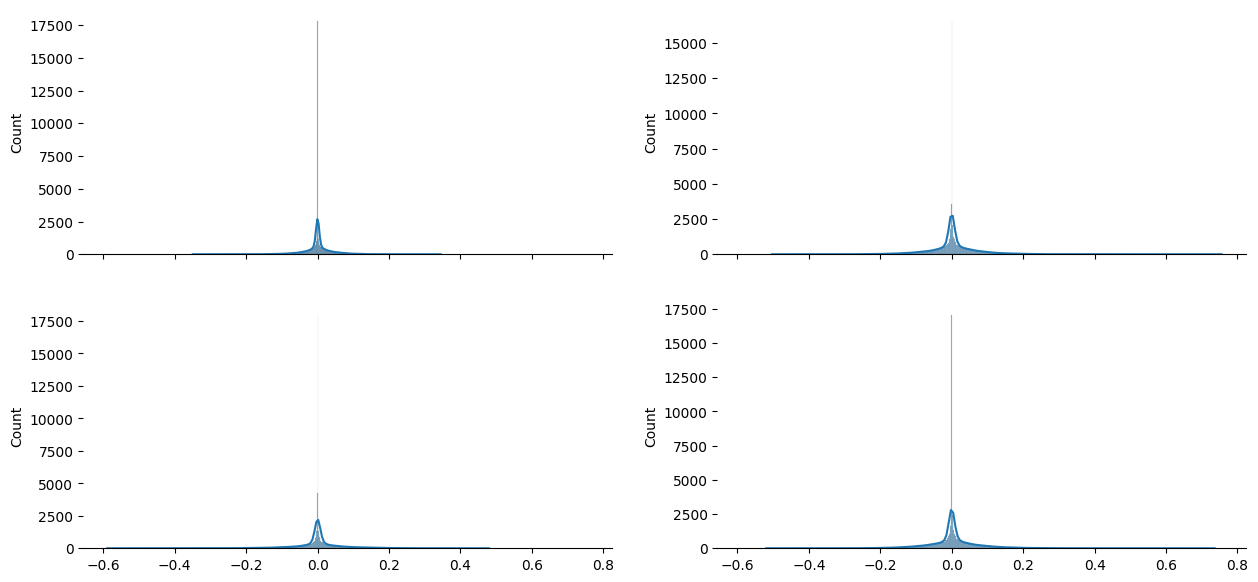

In [35]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
draw_diff("/CNNS/1.21_CNN_uni_Sigmoid_100_1000_0.5_samples=_40000/overtrain1", 0, 0)
draw_diff("/CNNS/1.21_CNN_normal_Sigmoid_100_1000_0.5_samples=_40000/0", 1, 0)
draw_diff("/CNNS/1.21_CNN_uni_Sigmoid_100_1000_2_samples=_40000/0", 0, 1)
draw_diff("/CNNS/1.21_CNN_normal_Sigmoid_100_1000_2_samples=_40000/0", 1, 1)

# DISTANCE AND NORM

For both Sigmoid and ReLU for α = 2 distance moved approached 7, and generated weights displayed moderate movement away from each other (about 1/36 of initial distance)

Let $W=(w_{ij})$ and $d$ be a real nubmer.

Let $K$ be a matrix of the same dimension as $W$ with all entries being some number $k$.

$|W+K| = d_n$

$|W+K|^2=d_n^2$

$∑(w_{ij}+k)^2 = d_n^2$

$∑w_{ij}^2 + 2k∑w_{ij} + mnk^2 = d_n^2$

We can approximate $∑w_{ij}^2 + 2k∑w_{ij}$ with $mn(Ew^2 + kEw)$

Solving for $k$:

$mnk^2 + mnkEw + mnEw^2 - d_n^2 = 0$

$k^2 + kEw + Ew^2 - \frac{d_n^2}{mn} = 0$

$Δ = (Ew)^2 - 4Ew^2 + \frac{4d_n^2}{mn}$

$k = \frac{-Ew \pm \sqrt{(Ew)^2 - 4Ew^2 + \frac{4d_n^2}{mn}}}{2}$

For uniform distribution:

$Ew = 0$

$Ew^2 = \int_{-0.5}^{0.5} x^2 dx  = \frac{2*0.5^3}{3} = \frac{1}{12}$

Then, $k = \pm \frac{\sqrt{- \frac{1}{3} + \frac{4d_n^2}{mn}}}{2}$

For normal distribution:

$Ew = 0$

$Ew^2 = σ^2$

Then $k = \pm \frac{\sqrt{-4\sigma^2 + \frac{4d_n^2}{mn}}}{2}$




# DISTANCE MOVED BASED ON α

## Training process

In [37]:
DW1, Db1, DW2, Db2 = [], [], [], []
NW1, Nb1, NW2, Nb2 = [], [], [], []

neurons = 10
iterations = 100
alpha = 0.1
activation = ReLU
deactivation = dReLU
samples = 40000

path = "/CNNS/alpha_to_distance_10_100_ReLU"
if not os.path.exists(path):
    os.makedirs(path)

for i in range(100):
    print("Training model ", i + 1)
    X_train, Y_train, X_dev, Y_dev = init_data(data)
    W1, b1, W2, b2, W1_, b1_, W2_, b2_ = gradient_descent(X_train, Y_train, neurons, iterations , alpha, activation, deactivation)

    np.save(os.path.join(path, str(i)+"W1"), W1)
    np.save(os.path.join(path, str(i)+"b1"), b1)
    np.save(os.path.join(path, str(i)+"W2"), W2)
    np.save(os.path.join(path, str(i)+"b2"), b2)
    np.save(os.path.join(path, str(i)+"W1_"), W1_)
    np.save(os.path.join(path, str(i)+"b1_"), b1_)
    np.save(os.path.join(path, str(i)+"W2_"), W2_)
    np.save(os.path.join(path, str(i)+"b2_"), b2_)

    DW1.append(np.sqrt(np.sum((W1 - W1_) ** 2)))
    Db1.append(np.sqrt(np.sum((b1 - b1_) ** 2)))
    DW2.append(np.sqrt(np.sum((W2 - W2_) ** 2)))
    Db2.append(np.sqrt(np.sum((b2 - b2_) ** 2)))
    NW1.append(np.sqrt(np.sum((W1 ** 2))))
    NW2.append(np.sqrt(np.sum((W2 ** 2))))
    Nb1.append(np.sqrt(np.sum((b1 ** 2))))
    Nb2.append(np.sqrt(np.sum((b2 ** 2))))

    print("Distance moved W1: ", np.sqrt(np.sum((W1 - W1_) ** 2)))
    print("Distance moved b1: ", np.sqrt(np.sum((b1 - b1_) ** 2)))
    print("Distance moved W2: ", np.sqrt(np.sum((W2 - W2_) ** 2)))
    print("Distance moved b2: ", np.sqrt(np.sum((b2 - b2_) ** 2)))
    print("Norm of W1: ", np.sqrt(np.sum((W1 ** 2))))
    print("Norm of W2: ", np.sqrt(np.sum((W2 ** 2))))
    print("Norm of b1: ", np.sqrt(np.sum((b1 ** 2))))
    print("Norm of b2: ", np.sqrt(np.sum((b2 ** 2))))
    alpha+=0.1

print(DW1)
print(NW1)


Training model  1


KeyboardInterrupt: 

In [ ]:
def show_movement(D, N, a, label='bla'):
  plt.figure()
  plt.subplot(211)
  plt.scatter(a, D)
  plt.xlabel(label)
  plt.ylabel('distance')
  plt.subplot(212)
  plt.scatter(a, N, c = '#ee3300')
  #mark D as distance on a graph
  plt.xlabel(label)
  plt.ylabel('norm')
  plt.show()

## sigmoid activation, iterations = 100, 0.1 alpha increment

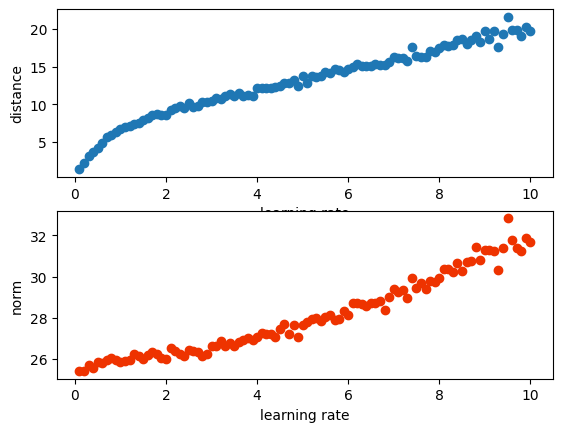

In [38]:
# sig 100
D = [1.342702629297282, 2.191342795606348, 3.139517057570402, 3.6275014506148384, 4.25039064359229, 4.9025446394569645, 5.631094068621409, 5.973278615486625, 6.28927937769928, 6.65391237782045, 6.917464565700895, 7.1009442747184774, 7.427983691973028, 7.524718148648901, 7.881284484362591, 8.16764751939884, 8.534318510785402, 8.751826344531267, 8.55086391450995, 8.542033513862478, 9.259044961888552, 9.476645750710652, 9.707976751372977, 9.547849566545704, 10.218850745064424, 9.58496887701682, 9.830440470355589, 10.324079291346285, 10.337812110205103, 10.392201846900884, 10.829490037514015, 10.692577770968402, 11.084991351202747, 11.372863066052807, 11.06200735764492, 11.54628091722543, 11.117641014665711, 11.232766703693908, 11.039130390543162, 12.15592793723284, 12.153204824140799, 12.201707919026756, 12.16945656180769, 12.310241632722162, 12.424930060525616, 12.88474567856507, 12.833167480823798, 13.250099126355376, 12.487027659255535, 13.699882481730382, 12.848161057139059, 13.78342651629183, 13.601121789217844, 13.728738386169283, 14.325234510765542, 14.15886341574392, 14.633942963236862, 14.487989919912227, 14.260444094580489, 14.685837754651278, 14.954145424128388, 15.355225752255214, 15.134644112133238, 15.14006616644082, 15.038506433289955, 15.395357577683024, 15.268642832884733, 15.227645849544656, 15.627219190575056, 16.2784895357616, 16.078048251440975, 16.16350321066313, 15.71589092217307, 17.558606493091922, 16.467892249542114, 16.314248309700005, 16.269391171957526, 17.017465909676492, 16.991641431751717, 17.483752665222788, 17.93076976823725, 17.69037491075876, 17.81782787961228, 18.469144805129197, 18.60749907238033, 18.053974649561034, 18.591896097021163, 19.06544617366002, 18.27089966090766, 19.676595942613165, 18.722207034967386, 19.68347195459744, 17.642105157532715, 19.27744792545024, 21.619905932373786, 19.845037643821954, 19.82536987373787, 19.122256799928174, 20.30396014384477, 19.687754167985194]
N = [25.4202378712544, 25.416787409828395, 25.731273562772962, 25.58859773091028, 25.839076467124528, 25.797596152934716, 25.9536424724113, 26.032349500248586, 25.95268973113176, 25.873331281337165, 25.89287046664387, 25.95932553125329, 26.22757489175923, 26.170902997402667, 26.026312777510853, 26.21691359138582, 26.337676855346043, 26.24554751088316, 26.03661969034254, 26.012466161217837, 26.532825454244385, 26.375342929402112, 26.269182238060587, 26.171326848190517, 26.42591274626672, 26.38428014064086, 26.355889479854607, 26.1401338209241, 26.22275778616164, 26.625492809866707, 26.63394705650271, 26.892283990712926, 26.621383917775457, 26.788148710737428, 26.632058540019283, 26.837160562795145, 26.901754515300354, 27.002141302314218, 26.948274542290665, 27.058838079336635, 27.268100261051018, 27.20477073658011, 27.219764272052664, 27.061468032057192, 27.466463765742247, 27.67721236937178, 27.222652568338425, 27.629740495563173, 27.09151518109772, 27.644119628697197, 27.776797473388932, 27.949983502240297, 27.970404359433378, 27.863385373895103, 28.027705039523198, 28.15652373523782, 27.90875639014448, 27.958653636963753, 28.31191311386136, 28.13790316516903, 28.703843946105867, 28.71190917259433, 28.67878571778852, 28.57585116658706, 28.743537829289007, 28.74007522755933, 28.79567403322625, 28.386536333931446, 29.017804073033798, 29.380830630716297, 29.267679076370253, 29.334867741980684, 28.982795902259667, 29.921103961607884, 29.456736972726727, 29.67194273481501, 29.38869873853036, 29.80721153628642, 29.736007587497404, 29.908767924452892, 30.356395740508834, 30.34759726037137, 30.22851967055534, 30.657280451503635, 30.28270957407702, 30.717665491674293, 30.739339187414085, 31.429919532629338, 30.808072837596303, 31.308918509123675, 31.27415561300313, 31.243280866666645, 30.336140602905306, 31.395739283003884, 32.82612228213282, 31.75621593660873, 31.405875264774647, 31.218971936758475, 31.87817037532695, 31.689680154987073]
a = [0.1+x/10 for x in range(100)]
show_movement(D, N, a, 'learning rate')


## ReLU activation, iterations = 100, 0.1 alpha increment

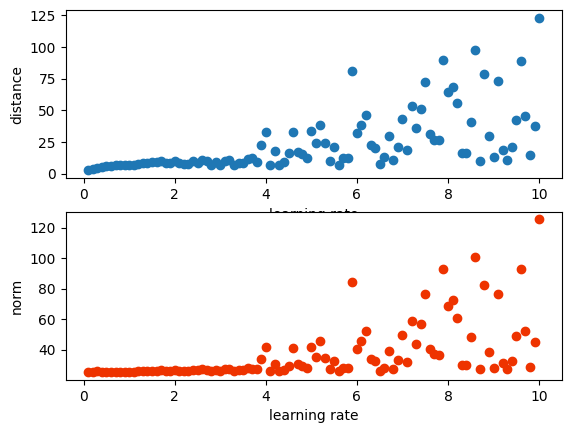

In [39]:
#relu 100
D = [2.6037499925978174, 3.9193727032966974, 4.677437753747685, 5.325320900389742, 5.7637220077088935, 6.141319625695006, 6.6726856075336975, 6.8523759862777025, 7.140494850727143, 7.325055147288389, 7.122756168888294, 7.925038683405529, 8.3596438015224, 8.44192382487607, 8.911955893800027, 9.396930058094563, 9.909914327610966, 8.562029520434415, 8.20880033519231, 9.849921312856583, 8.20572252387097, 8.040729016422782, 7.8490590892492325, 9.80791088872823, 8.852417400538734, 10.963627786267349, 10.17269289584518, 6.8839133483905, 9.390483652834275, 6.883570618280321, 10.178951933564525, 11.037257459595633, 6.8522099949869295, 8.16017323825549, 8.666490430287283, 11.813375304104133, 12.17142386576048, 9.366703522379074, 22.9232924254522, 33.14858095154914, 7.043608586969769, 18.101802862396205, 7.201591085038459, 9.097977163188148, 16.053769354033726, 33.30102728849889, 17.198419509426866, 15.587960757911027, 12.57949625955398, 33.504472584420846, 24.655785288125244, 38.5616042547094, 24.238529700171913, 10.31599849606622, 21.45843788881904, 6.747774779844792, 12.67821280179796, 12.35127904806802, 80.82348641105753, 32.15203887499845, 38.23152549577765, 46.63806574465302, 23.00108469338739, 20.221986940274583, 7.779723420792508, 12.906069160914194, 29.782481599774886, 10.755414547602195, 20.815208436010906, 42.97167657877696, 19.10470568220304, 53.16746284375442, 36.19675311327017, 51.4322276968356, 72.54441963911246, 31.484794495045104, 26.812137846814935, 26.64378926775453, 89.64760337486501, 64.67497676227612, 68.78534260261893, 55.69990536680976, 16.274048483880346, 16.688379830582996, 41.19500789945789, 97.87710220828035, 10.482996729242513, 78.67828126777152, 29.912372857403536, 13.423365898004894, 72.84769353929687, 18.724604556495702, 10.883648557402477, 21.316505271455462, 42.716955016800625, 89.32979540399963, 45.4229374821944, 14.703156843420919, 37.98813755818179, 123.11177141825534]
N = [25.698519015334107, 25.708665250655084, 25.849783349585174, 25.63025301346104, 25.560414813156875, 25.62177578113908, 25.66388576925986, 25.590100215749587, 25.419162426521183, 25.63788749878543, 25.690108864218722, 26.00039553270879, 25.8668570413326, 25.951195463832235, 26.09201372801532, 26.34601457232037, 26.751704799398603, 26.32486256331825, 26.168238631968563, 26.898685309279923, 26.133610060450028, 26.34132981598541, 26.0897736978098, 26.702653565720944, 26.745774590244448, 27.26220510325792, 26.648234201087686, 26.190168291536654, 26.59391148257779, 26.165116303746032, 27.320583239550892, 27.417192775255064, 26.064279162917817, 26.499697374808125, 26.51142538171192, 27.876834461039962, 27.551088904469516, 27.13277830986651, 33.87931388455298, 41.85477116379052, 26.35884632810288, 30.8637596246735, 26.251347798223087, 26.784478925822135, 29.6931351940903, 41.49357543515311, 30.775846023547615, 29.391406624431482, 27.984557358305985, 41.62672900630994, 35.529753290220086, 45.87696519798186, 34.70876911228143, 27.23084996781058, 32.74085481983921, 26.28544321488232, 28.313205787781758, 28.012449511200337, 84.55794972708419, 40.793918389164446, 45.58168402896082, 52.558761325926575, 34.0974449814679, 32.41614919431143, 26.29378218416185, 28.332538073401917, 39.05530712331378, 27.25287697405558, 33.05470715945388, 49.45214976650184, 31.701080179264007, 58.88644044656933, 44.064985406422466, 56.69985115641416, 76.67309509443531, 40.356577316219195, 37.02072184733188, 36.6777063796627, 93.0823093960643, 68.91380707423856, 72.8898414058977, 60.95213568741599, 29.894284690166288, 29.913597281960598, 48.07320342258719, 100.7634952119175, 27.41367674780528, 82.32186530322724, 38.777032031193635, 28.367658995681243, 76.65727792518786, 31.116001432929924, 27.410742163154623, 32.79728376787412, 49.36457049833731, 92.65092810712332, 52.01743634978858, 29.022929653412998, 45.3148202327957, 125.42984881157028]
a = [0.1+x/10 for x in range(100)]

show_movement(D, N, a, 'learning rate')


ReLU is less stable (resists convergence?)

# DISTANCE MOVED BASED ON EPOCHES


## Training process

In [8]:
DW1, Db1, DW2, Db2 = [], [], [], []
NW1, Nb1, NW2, Nb2 = [], [], [], []

neurons = 10
iterations = 10
alpha = 4
activation = ReLU
deactivation = dReLU
samples = 40000

W1, b1, W2, b2 = init_params_uni(neurons)
W1_, b1_, W2_, b2_ = W1, b1, W2, b2
X_train, Y_train, X_dev, Y_dev = init_data(data)
#        Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X, activation)
#        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, deactivation)
#        W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

path = "/CNNS/2.5_epochs_to_dependant_distance_4_1000_10_ReLU"
if not os.path.exists(path):
    os.makedirs(path)

for i in range(100):
    for j in range(10):
      Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X_train, activation)
      dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X_train, Y_train, deactivation)
      W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    np.save(os.path.join(path, str(i)+"W1"), W1)
    np.save(os.path.join(path, str(i)+"b1"), b1)
    np.save(os.path.join(path, str(i)+"W2"), W2)
    np.save(os.path.join(path, str(i)+"b2"), b2)
    np.save(os.path.join(path, str(i)+"W1_"), W1_)
    np.save(os.path.join(path, str(i)+"b1_"), b1_)
    np.save(os.path.join(path, str(i)+"W2_"), W2_)
    np.save(os.path.join(path, str(i)+"b2_"), b2_)

    DW1.append(np.sqrt(np.sum((W1 - W1_) ** 2)))
    Db1.append(np.sqrt(np.sum((b1 - b1_) ** 2)))
    DW2.append(np.sqrt(np.sum((W2 - W2_) ** 2)))
    Db2.append(np.sqrt(np.sum((b2 - b2_) ** 2)))
    NW1.append(np.sqrt(np.sum((W1 ** 2))))
    NW2.append(np.sqrt(np.sum((W2 ** 2))))
    Nb1.append(np.sqrt(np.sum((b1 ** 2))))
    Nb2.append(np.sqrt(np.sum((b2 ** 2))))

#    print("Distance moved W1: ", np.sqrt(np.sum((W1 - W1_) ** 2)))
#    print("Distance moved b1: ", np.sqrt(np.sum((b1 - b1_) ** 2)))
#    print("Distance moved W2: ", np.sqrt(np.sum((W2 - W2_) ** 2)))
#    print("Distance moved b2: ", np.sqrt(np.sum((b2 - b2_) ** 2)))
#    print("Norm of W1: ", np.sqrt(np.sum((W1 ** 2))))
#    print("Norm of W2: ", np.sqrt(np.sum((W2 ** 2))))
#    print("Norm of b1: ", np.sqrt(np.sum((b1 ** 2))))
#    print("Norm of b2: ", np.sqrt(np.sum((b2 ** 2))))


print(DW1)
print(NW1)

[17.499761799044503, 17.499910415224956, 17.50034544867141, 17.502841869236946, 17.559445229402737, 17.639850328486872, 17.741568825052685, 17.79032997866904, 17.84067743392587, 17.867603091560238, 17.891301343307607, 17.921241376949762, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.933

## Distance based on epoches (same network)

Here we can see how distance traveled and norm behave for a singular network being trained continuously.


This data should be extractable from the weight matrices I saved, but I just grabbed in in the process and saved in here.

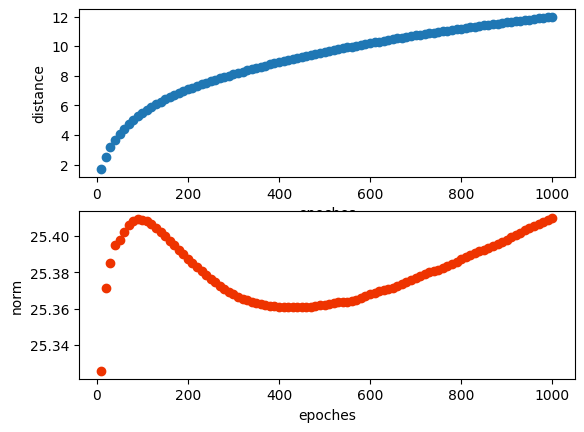

In [41]:
data = pd.read_csv('/CNNS/train.csv')
data = np.array(data)
data = data.T
Y = data[0]
X = data[1:]

def get_data_named(path):
  W1 = np.load(os.path.join(path, "99W1.npy"))
  b1 = np.load(os.path.join(path, "99b1.npy"))
  W2 = np.load(os.path.join(path, "99W2.npy"))
  b2 = np.load(os.path.join(path, "99b2.npy"))
  return W1, b1, W2, b2

def get_accuracies(W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X, ReLU)
    return(get_accuracy(get_predictions(A2), Y))

#W1, b1, W2, b2 = get_data_named("/CNNS/epochs_to_dependant_distance_10_1000_0.5_ReLU")
#print(get_accuracies(W1, b1, W2, b2))

# all networks activate with Sigmoid
# eta = 0.5 epoches = 1000
D = [1.6658679215248944, 2.534751255339586, 3.176873971446492, 3.6684386253216403, 4.069747638749615, 4.430357459432556, 4.738336803935109, 5.015193778947058, 5.265451692346924, 5.492864672765392, 5.700699641778795, 5.893195034137773, 6.072708135573967, 6.240998551180986, 6.399688089248579, 6.5501672235072945, 6.692154220720086, 6.826270885802423, 6.954503860397266, 7.077551522394357, 7.195911772768907, 7.3098441938370815, 7.419973268248856, 7.526200183141566, 7.628761582491056, 7.728451819966348, 7.825712269953971, 7.920662915483678, 8.013254960626135, 8.103637815668195, 8.192342889802527, 8.279118743129366, 8.363867915329175, 8.446930714974505, 8.528669978084126, 8.609073255198744, 8.688093969141134, 8.765554570355231, 8.841503299975395, 8.916055145429567, 8.989373671325245, 9.061609866716442, 9.132956787366963, 9.203226094031606, 9.272346013250786, 9.340546276874766, 9.407854389133059, 9.474189399634072, 9.539579354726602, 9.603705396733295, 9.666845571720382, 9.729219981038684, 9.791260780589282, 9.853076183924745, 9.913294909608348, 9.971657894838728, 10.029225206409066, 10.086288577071773, 10.142775015546935, 10.198599431848248, 10.254017847458561, 10.309080320197255, 10.36387881046932, 10.417544796394765, 10.469676518019158, 10.520998125043427, 10.571844575180544, 10.622288427125069, 10.672220126073903, 10.721640249680654, 10.770606937300103, 10.81925525429315, 10.867701972718557, 10.915423127064946, 10.961751865011493, 11.007101357979336, 11.052066714529705, 11.096785167440405, 11.14110839143377, 11.1850916640546, 11.22868035282118, 11.27196957746576, 11.315126732677117, 11.357923569524669, 11.400066667413858, 11.441474086593574, 11.482319627724081, 11.522792722232913, 11.563004515140303, 11.602896760657325, 11.642469659218277, 11.681708311328618, 11.720612285263789, 11.759147362872536, 11.797409185684547, 11.835388977086321, 11.87299997898151, 11.910139005676845, 11.946772755076907, 11.982951387083984]
N = [25.325743969000833, 25.371225348806544, 25.38497657446519, 25.395153093878296, 25.397433352183832, 25.401810522954992, 25.405994452278307, 25.407923364438577, 25.40909688575518, 25.408886234249902, 25.407872008694408, 25.406217111879023, 25.404311242618764, 25.40210449334182, 25.399685025807212, 25.397152213282162, 25.394638146455193, 25.392282563888493, 25.389836332693914, 25.387265265065295, 25.384879172284478, 25.382678384741492, 25.380495058711546, 25.37835704410131, 25.376356818088986, 25.37442871432481, 25.37253251542713, 25.37078481477101, 25.36924829736516, 25.367862103199112, 25.36660846658444, 25.365492579532166, 25.36456269955827, 25.36381719274442, 25.363170818522605, 25.36257638814063, 25.36203375515724, 25.36158324186815, 25.361255729194912, 25.361045743317106, 25.360905322307136, 25.360787612465987, 25.360684347259742, 25.360629584772013, 25.360682950529426, 25.360859650085384, 25.36112740317857, 25.36144460764888, 25.361806835331837, 25.362228486615987, 25.362723517584154, 25.36322763144809, 25.363579513435027, 25.363555698093457, 25.363606805407812, 25.36415558329255, 25.364938450380784, 25.365834271208733, 25.36680230167756, 25.36780304593532, 25.368799443994305, 25.369672449746282, 25.37025898843541, 25.37074346008511, 25.37151514767996, 25.37248747194732, 25.373546486088603, 25.374655610066203, 25.375793588336215, 25.37694655802132, 25.378074905160922, 25.37910936235697, 25.379940573146314, 25.38061333106251, 25.381439256615444, 25.38243853979593, 25.38352788931511, 25.384663069165992, 25.385822739183702, 25.386993887929062, 25.38816909924711, 25.389316471191957, 25.390387723839044, 25.391359243794916, 25.392287617760502, 25.393276526471567, 25.39435328784848, 25.395491877173967, 25.396683871533114, 25.397901633911086, 25.399148441919916, 25.400407277693443, 25.401660283309795, 25.402883888758776, 25.40406741011628, 25.40519530495137, 25.40627120322995, 25.407327926919326, 25.408398017468762, 25.409513788943578]

# eta = 10 epoches = 1000
#D = [16.26865089140758, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194, 16.9536796499194]
#N = [29.809153123934305, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893, 30.193020492314893]

# eta = 5 epoches = 1000
#D = [20.65707847929232, 20.766013584857223, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918, 23.82165535912918]
#N = [32.360595528105634, 32.42001069089059, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365, 34.5122085294365]

# eta = 4 epoches = 1000
#D = [17.499761799044503, 17.499910415224956, 17.50034544867141, 17.502841869236946, 17.559445229402737, 17.639850328486872, 17.741568825052685, 17.79032997866904, 17.84067743392587, 17.867603091560238, 17.891301343307607, 17.921241376949762, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741, 17.9335826906741]
#N = [30.500473197243338, 30.501422929083958, 30.503028557707037, 30.50775256114442, 30.534076038055996, 30.564754085413547, 30.599652167078812, 30.61895597269314, 30.634761871534636, 30.64271074397525, 30.653267201636293, 30.66857415795281, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658, 30.68934990359658]

a = range(10, 1001, 10)

show_movement(D, N, a, 'epoches')


# Distance and norm based on epoches (different networks)

Here, we train different networks using the same starting distribution, learning rate and nubmer of neurons and plot out the change in distance of their biggest weight matrix.

In [ ]:
DW1, Db1, DW2, Db2 = [], [], [], []
NW1, Nb1, NW2, Nb2 = [], [], [], []

neurons = 10
iterations = 10
alpha = 0.5
activation = ReLU
deactivation = dReLU
samples = 40000

W1, b1, W2, b2 = init_params_uni(neurons)
W1_, b1_, W2_, b2_ = W1, b1, W2, b2
X_train, Y_train, X_dev, Y_dev = init_data(data)
#        Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X, activation)
#        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y, deactivation)
#        W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

path = "/CNNS/1.22_epochs_to_independant_distance_10_1000_0.5_ReLU"
if not os.path.exists(path):
    os.makedirs(path)

for i in range(20):
    W1, b1, W2, b2 = init_params_uni(neurons)
    W1_, b1_, W2_, b2_ = W1, b1, W2, b2
    X_train, Y_train, X_dev, Y_dev = init_data(data)
    for j in range((i+1)*50):
      if (j%50==0):
        print("iteration number ", j)
      Z1, A1, Z2, A2     = forward_prop(W1, b1, W2, b2, X_train, activation)
      dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X_train, Y_train, deactivation)
      W1, b1, W2, b2     = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    np.save(os.path.join(path, str(i)+"W1"), W1)
    np.save(os.path.join(path, str(i)+"b1"), b1)
    np.save(os.path.join(path, str(i)+"W2"), W2)
    np.save(os.path.join(path, str(i)+"b2"), b2)
    np.save(os.path.join(path, str(i)+"W1_"), W1_)
    np.save(os.path.join(path, str(i)+"b1_"), b1_)
    np.save(os.path.join(path, str(i)+"W2_"), W2_)
    np.save(os.path.join(path, str(i)+"b2_"), b2_)

    DW1.append(np.sqrt(np.sum((W1 - W1_) ** 2)))
    Db1.append(np.sqrt(np.sum((b1 - b1_) ** 2)))
    DW2.append(np.sqrt(np.sum((W2 - W2_) ** 2)))
    Db2.append(np.sqrt(np.sum((b2 - b2_) ** 2)))
    NW1.append(np.sqrt(np.sum((W1 ** 2))))
    NW2.append(np.sqrt(np.sum((W2 ** 2))))
    Nb1.append(np.sqrt(np.sum((b1 ** 2))))
    Nb2.append(np.sqrt(np.sum((b2 ** 2))))

    print("Distance moved W1: ", np.sqrt(np.sum((W1 - W1_) ** 2)))
    print("Distance moved b1: ", np.sqrt(np.sum((b1 - b1_) ** 2)))
    print("Distance moved W2: ", np.sqrt(np.sum((W2 - W2_) ** 2)))
    print("Distance moved b2: ", np.sqrt(np.sum((b2 - b2_) ** 2)))
    print("Norm of W1: ", np.sqrt(np.sum((W1 ** 2))))
    print("Norm of W2: ", np.sqrt(np.sum((W2 ** 2))))
    print("Norm of b1: ", np.sqrt(np.sum((b1 ** 2))))
    print("Norm of b2: ", np.sqrt(np.sum((b2 ** 2))))


print(DW1)
print(NW1)

iteration number  0
Distance moved W1:  4.123226217432542
Distance moved b1:  0.7977751100695812
Distance moved W2:  2.8724225399699184
Distance moved b2:  1.2098374922832816e-16
Norm of W1:  25.736928932280247
Norm of W2:  3.5668661324222204
Norm of b1:  1.394641239113292
Norm of b2:  0.7579316964245972
iteration number  0
iteration number  50
Distance moved W1:  5.659241530117438
Distance moved b1:  0.7164588612880973
Distance moved W2:  3.4208124229773507
Distance moved b2:  7.964629152901884e-17
Norm of W1:  25.460455506929616
Norm of W2:  4.271021683770112
Norm of b1:  0.9778683643162409
Norm of b2:  0.6033922547729654
iteration number  0
iteration number  50
iteration number  100
Distance moved W1:  6.522140569099208
Distance moved b1:  2.2849551012608784
Distance moved W2:  4.079170581408382
Distance moved b2:  3.2840038165476226e-16
Norm of W1:  25.613313197998348
Norm of W2:  4.105612004481134
Norm of b1:  2.0708390945545414
Norm of b2:  0.9229439130719963
iteration number  0


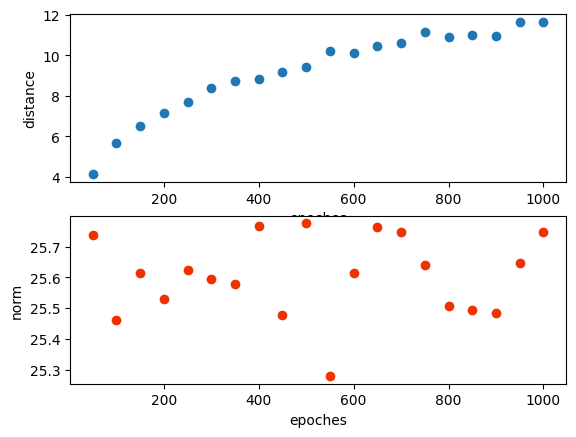

In [45]:
path = "/CNNS/alpha_to_dependant_distance_10_1000_0.5_ReLU"


D = [4.123226217432542, 5.659241530117438, 6.522140569099208, 7.166850166368504, 7.6792232586713505, 8.393561352138464, 8.713927130611584, 8.813449564950318, 9.194305228131325, 9.399891818908673, 10.190508888890294, 10.129601189339244, 10.434097090325468, 10.596826282701791, 11.169479225783755, 10.877615761572363, 11.000356448889487, 10.940156450240517, 11.639101736332131, 11.651689082443834]
N = [25.736928932280247, 25.460455506929616, 25.613313197998348, 25.530337074476552, 25.62536399624552, 25.59400270369177, 25.57827985838828, 25.76652902125231, 25.47761006068192, 25.775216878028914, 25.27964965966514, 25.615352398476993, 25.763756605606282, 25.74572088778308, 25.64106736635036, 25.5070016868818, 25.495567968158287, 25.485849339099985, 25.647616144335313, 25.74571972773433]
a = range(50, 1001, 50)

show_movement(D, N, a, 'epoches')

https://arxiv.org/pdf/2004.07780

https://arxiv.org/pdf/2401.01867